## Azure OpenAI Configuration

Add your [Azure Open AI Service key](https://learn.microsoft.com/azure/cognitive-services/openai/quickstart?pivots=programming-language-studio) settings to a `.env` file in the same folder:

```
AZURE_OPENAI_API_KEY="..."
AZURE_OPENAI_ENDPOINT="https://..."
AZURE_OPENAI_DEPLOYMENT_NAME="..."
```

and add Azure OpenAI Text Completion to the kernel:

In [1]:
import os, openai, time
import pandas as pd
import numpy as np
from dotenv import load_dotenv

load_dotenv() # reads from .env file

azure_openai_endpoint        = os.getenv('AZURE_OPENAI_ENDPOINT')
azure_openai_deployment_name = os.getenv('AZURE_OPENAI_DEPLOYMENT_NAME')
azure_openai_api_key         = os.getenv('AZURE_OPENAI_API_KEY')

cogSvcsEndpoint              = os.getenv("COGNITIVE_SERVICES_ENDPOINT")
cogSvcsApiKey                = os.getenv("COGNITIVE_SERVICES_API_KEY")

Bad pipe message: %s [b'tJx\x92\xb3S\x0c\x06\xec"q\xe9l\xb1\xc7\x08)\x0e ']
Bad pipe message: %s [b'\xe9 \x03\x8d\x08\x95s\xeb\x907[\x9c\xb7\xdeY4O\xfa\x14\xa9\x9c\xf9\xea\xf60E\xb6&Ga\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05', b'\x03\x08']
Bad pipe message: %s [b'\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \xf7x\xe8r_\xc1T\xfd\xd0Y\xe6\x8d][\xdd\xa9/0\x02\x87\xfb4']
Bad pipe message: %s [b"1fQ\xd2\x82\xe7\xb6\xc6\xa30\xd8m.O?\x96\xe4\xe0\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc

# Setup
Import Semantic Kernel SDK from pypi.org

In [ ]:
# !python -m pip install -r requirements.txt

import semantic_kernel as sk

kernel_emb = sk.Kernel()
kernel_prompt = sk.Kernel()

In [ ]:
from semantic_kernel.ai.open_ai import AzureTextCompletion, OpenAITextEmbedding

deployment_embeddings, api_key, endpoint = sk.azure_openai_settings_from_dot_env()
deployment_embeddings = "text-embedding-ada-002"

kernel_emb.config.add_embedding_backend(deployment_embeddings, OpenAITextEmbedding(deployment_embeddings, endpoint, api_key))
kernel_emb.config.set_default_embedding_backend(deployment_embeddings)

# print(f"deployment:\t{deployment_embeddings}\napi_key:\t{api_key}\nendpoint:\t{endpoint}")

# Calculate Word Embeddings
To use word embeddings for semantic search, you first compute the embeddings for a corpus of text using a word embedding algorithm. What does this mean? We are going to create a numerical representation of each of these words. To perform this computation, we'll use OpenAI's 'get_embedding' function.

Since we have our words in a pandas dataframe, we can use "apply" to apply the get_embedding function to each row in the dataframe. We then store the calculated word embeddings in a new text file called "word_embeddings.csv" so that we don't have to call OpenAI again to perform these calculations.

# Generate text embeddings with Azure Open AI
https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/embeddings?tabs=console

## generate a single embedding with Azure Open AI

In [ ]:
import openai
import time

openai.api_type = "azure"
openai.api_key = api_key
openai.api_base = endpoint
openai.api_version = "2022-12-01"

response = openai.Embedding.create(
    input="coniglio",
    engine=deployment_embeddings
)
embeddings = response['data'][0]['embedding']
embeddings

## operationalize openai embeddings function

In [ ]:
def generate_openai_embeddings(text, opeanaiEndpoint, openaiApiKey):
    import openai
    
    openai.api_type = "azure"
    openai.api_version = "2022-12-01"
    openai.api_base = opeanaiEndpoint
    openai.api_key = openaiApiKey
    
    response = openai.Embedding.create(
        input=text,
        engine=deployment_embeddings)    
    
    return response['data'][0]['embedding']

embeddings = generate_openai_embeddings ("coniglio", azure_openai_endpoint, azure_openai_api_key)
print(f"embeddings shape: {np.array(embeddings).shape}. Now showing the first 5 elements:\n{embeddings[:5]}")

# Generate text embeddings with Azure Computer Vision Image Retrieval
https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/overview-image-analysis?tabs=4-0#image-retrieval-v40-preview-only

In [ ]:
def generate_cv_embeddings(text, cogSvcsEndpoint, cogSvcsApiKey):
    import requests
    url = f"{cogSvcsEndpoint}/computervision/retrieval:vectorizeText"  
  
    params = {  
        "api-version": "2023-02-01-preview"  
    }  
  
    headers = {  
        "Content-Type": "application/json",  
        "Ocp-Apim-Subscription-Key": cogSvcsApiKey  
    }  
  
    data = {  
        "text": text  
    }  
  
    response = requests.post(url, params=params, headers=headers, json=data)  
  
    if response.status_code == 200:  
        embeddings = response.json()["vector"]  
        return embeddings  
    else:  
        print(f"Error: {response.status_code} - {response.text}")  
        return None  

embeddings = generate_cv_embeddings ("coniglio", cogSvcsEndpoint, cogSvcsApiKey)
print(f"embeddings shape: {np.array(embeddings).shape}. Now showing the first 5 elements:\n{embeddings[:5]}")

# Cosine similarity
https://en.wikipedia.org/wiki/Cosine_similarity
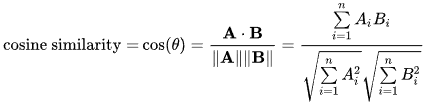

In [ ]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])
numerator = np.dot(v1,v2) # 4+10+18
numerator

In [ ]:
denominator_1 = np.linalg.norm(v1) # sqrt (1+4+9) = 3.74
denominator_2 = np.linalg.norm(v2) # sqrt (16+25+36) = 8.77
denominator   = denominator_1 * denominator_2
denominator

In [ ]:
print(numerator / denominator)

In [ ]:
def cosine_similarity(v1,v2):
    numerator = np.dot(v1,v2)
    denumerator = np.linalg.norm(v1) * np.linalg.norm(v2)
    return numerator / denumerator

cosine_similarity(np.array([1,2,3]),np.array([-4,5,6]))

In [ ]:
cosine_similarity(np.array([1,2,3,-1,2,3,-1,2,3,-1,2,3]),np.array([-4,5,6,4,5,-6,4,5,-6,4,5,6]))

## Check distance between two words (AzureOpenAI)

In [ ]:
v1 = generate_openai_embeddings ("coniglio", azure_openai_endpoint, azure_openai_api_key)
v2 = generate_openai_embeddings ("elefante", azure_openai_endpoint, azure_openai_api_key)

cosine_similarity(v1,v2)

## Check distance between two words (Computer Vision Image Retrieval)

In [ ]:
v1 = generate_cv_embeddings ("coniglio", cogSvcsEndpoint, cogSvcsApiKey)
v2 = generate_cv_embeddings ("elefante", cogSvcsEndpoint, cogSvcsApiKey)

cosine_similarity(v1,v2)

# Read Data File Containing Words
Now that we have configured OpenAI, let's start with a simple CSV file with familiar words

In [ ]:
file_name = 'words'
openai_df = pd.read_csv(f'{file_name}.csv')
cv_df     = openai_df.copy()
print(openai_df)

# Check words similarity (Azure Open AI)

In [ ]:
try:    
    openai_df["text_embeddings"] = openai_df["text"].apply(lambda x: generate_openai_embeddings(x, azure_openai_endpoint, azure_openai_api_key))
    openai_df.to_pickle(f"{file_name}_enriched.pkl") # type(df['embeddings'][0][0]) --> float  
except:
    print('switching to pickle file...')
    openai_df = pd.read_pickle(f"{file_name}_enriched.pkl")

openai_df

In [ ]:
search_term = input ('Insert a search term:\n') # hot dog

search_term_vector = generate_openai_embeddings(search_term, azure_openai_endpoint, azure_openai_api_key)
openai_df["similarity"] = openai_df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
openai_df

In [ ]:
openai_df.sort_values("similarity", ascending=False)

In [ ]:
search_term = "" # torta
search_term_vector = generate_openai_embeddings(search_term, azure_openai_endpoint, azure_openai_api_key)
openai_df2 = openai_df.copy()
openai_df2["similarity"] = openai_df2["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
openai_df2 = openai_df2.sort_values("similarity", ascending=False)
openai_df2

# Check words similarity (Computer Vision Image Retrieval)

In [ ]:
try:    
    cv_df["text_embeddings"] = cv_df["text"].apply(lambda x: generate_cv_embeddings (x, cogSvcsEndpoint, cogSvcsApiKey))
    cv_df.to_pickle(f"{file_name}_cv_enriched.pkl") # type(df['embeddings'][0][0]) --> float  
except:
    print('switching to pickle file...')
    cv_df = pd.read_pickle(f"{file_name}_cv_enriched.pkl")

cv_df

In [ ]:
search_term = input ('Insert a search term:\n') # hot dog

search_term_vector = generate_cv_embeddings(search_term, cogSvcsEndpoint, cogSvcsApiKey)
cv_df["similarity"] = cv_df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
cv_df.sort_values("similarity", ascending=False)

# Azure Open AI vs. Computer Vision Image Retrieval

In [ ]:
pd.concat([
    cv_df.sort_values("similarity", ascending=False).reset_index(drop=True).rename(columns={'text': 'openai'}), 
    openai_df.sort_values("similarity", ascending=False).reset_index(drop=True).rename(columns={'text': 'cog_svc'})], 
    axis=1).drop(['similarity', 'text_embeddings'], axis=1)

# Campaign Speeches

In [ ]:
file_name = 'discorso_presidente_del_consiglio'

openai_df = pd.read_csv(f'{file_name}.csv')

openai_df

## Embeddings generation for Campaign Speech with Azure Open AI

In [ ]:
start = time.time()
try:
    openai_df["text_embeddings"] = openai_df["text"].apply(lambda x: generate_openai_embeddings(x, azure_openai_endpoint, azure_openai_api_key))
    openai_df.to_pickle(f"{file_name}_openai_enriched.pkl") # type(df['embeddings'][0][0]) --> float
    openai_df.to_csv(f"{file_name}_openai_enriched.csv") # type(df['embeddings'][0][0]) --> string

except:
    print("switching to pickle file...")
    openai_df = pd.read_pickle(f"{file_name}_openai_enriched.pkl")

end = time.time()
print(f"duration: {end - start}")

openai_df

In [ ]:
# accoglienza profughi extracomunitari
# a quali gruppi appartiene l'Italia?
search_term = input ('Insert a search term:\n') 

search_term_vector = generate_openai_embeddings(search_term, azure_openai_endpoint, azure_openai_api_key)
openai_df["similarity"] = openai_df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
openai_df.sort_values("similarity", ascending=False).head(5)

## Embeddings generation for Campaign Speech with Computer Vision

In [ ]:
cv_df = openai_df.copy()

start = time.time()
try:
    cv_df["text_embeddings"] = cv_df["text"].apply(lambda x: generate_cv_embeddings (x, cogSvcsEndpoint, cogSvcsApiKey))
    cv_df.to_pickle(f"{file_name}_cv_enriched.pkl") # type(df['embeddings'][0][0]) --> float
    cv_df.to_csv(f"{file_name}_cv_enriched.csv") # type(df['embeddings'][0][0]) --> string

except:
    print("switching to pickle file...")
    cv_df = pd.read_pickle(f"{file_name}_cv_enriched.pkl")

end = time.time()
print(f"duration: {end - start}")

cv_df

In [ ]:
# accoglienza profughi extracomunitari
# a quali gruppi appartiene l'Italia?
search_term = input ('Insert a search term:\n') 

search_term_vector = generate_cv_embeddings (search_term, cogSvcsEndpoint, cogSvcsApiKey)
cv_df["similarity"] = cv_df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
cv_df.sort_values("similarity", ascending=False).head(5)

## Generalize top paragraphs identification with Azure Open AI

In [ ]:
def top_paragraphs_identification (search_term, top_terms=5):
    search_term_vector = generate_openai_embeddings(search_term, azure_openai_endpoint, azure_openai_api_key)
    openai_df["similarity"] = openai_df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
    return openai_df.sort_values("similarity", ascending=False).head(top_terms)

question = "quale strada vuole perseguire il governo?"
best_paragraphs_df = top_paragraphs_identification(question)
best_paragraph_nr = best_paragraphs_df.index[0]
best_paragraph_text = best_paragraphs_df["text"][best_paragraph_nr]
print(f"The best answer should be in paragraph #{best_paragraph_nr}:\n{best_paragraph_text}")

# Semantic Kernel in Action!

In [ ]:
from semantic_kernel.ai.open_ai import AzureTextCompletion

deployment, api_key, endpoint = sk.azure_openai_settings_from_dot_env()
deployment_completion = "text-davinci-003"

kernel_prompt.config.add_text_backend(deployment_completion, AzureTextCompletion(deployment_completion, endpoint, api_key))
kernel_prompt.config.set_default_text_backend(deployment_completion)

print(f"deployment:\t{deployment_completion}\napi_key:\t******\nendpoint:\t{endpoint}")

In [ ]:
# note: using find_and_search_skill
skills_directory = "./skills"

mauromi_skills = kernel_prompt.import_semantic_skill_from_directory(skills_directory, "mauromi_skills")

#...is equivalent to the following two lines:
find_and_search_function = mauromi_skills["find_and_search_function"]

In [ ]:
skills_directory = "./skills"
skills_set       = "mauromi_skills"
specific_skill   = "find_and_search_function"

# note: using find_and_search_skill...
mauromi_skills = kernel_prompt.import_semantic_skill_from_directory(skills_directory, skills_set)
find_and_search_function = mauromi_skills[specific_skill]

#...is equivalent to the following lines:
with open(os.path.join(skills_directory,skills_set,specific_skill,"skprompt.txt")) as f:
    prompt = f.read()
    f.close()
    
find_and_search_function = kernel_prompt.create_semantic_function(prompt)

In [ ]:
# A quali gruppi appartiene l'Italia?
# Quali sono le grandi sfide dell'Unione Europea?
# Che cosa hanno fatto le Forze Armate?
# A quali gruppi appartiene la Corea del Nord?
question = "A quali gruppi appartiene la Corea del Nord?"

best_paragraphs_df  = top_paragraphs_identification(question)
best_paragraph_nr   = best_paragraphs_df.index[0]
best_paragraph_text = best_paragraphs_df["text"][best_paragraph_nr]

context_variables = sk.ContextVariables()
context_variables["question"] = question
# context_variables["style"] = 'se non trovi la risposta nel testo, rispondi NON LO SO'

# the <input> variable is passed to the semantic function, rather than to ContextVariables()
answer = find_and_search_function(input=best_paragraph_text, variables=context_variables)

print(f"Question: {question}\n\nAnswer from paragraph {best_paragraph_nr}:\n{answer.result.lstrip('.').lstrip()}")

## Same test, but this time we use *kernel.run_async* that is useful for chaining
**ContextVariables** is the same collection object used above, to which we need to add the "input" variable

In [ ]:
# A quali gruppi appartiene l'Italia?
# Quali sono le grandi sfide dell'Unione Europea?
# Che cosa hanno fatto le Forze Armate?
# A quali gruppi appartiene la Corea del Nord?
question = "A quali gruppi appartiene la Corea del Nord?"

best_paragraphs_df  = top_paragraphs_identification(question)
best_paragraph_nr   = best_paragraphs_df.index[0]
best_paragraph_text = best_paragraphs_df["text"][best_paragraph_nr]

context_variables = sk.ContextVariables()
context_variables["input"]    = best_paragraph_text
context_variables["question"] = question
# context_variables["style"]    = 'se non trovi la risposta nel testo, rispondi NON LO SO'

# run_async receives the semantica function and ContextVariables() which contain the <input> too
answer = await kernel_prompt.run_async(find_and_search_function, input_vars=context_variables)

print(f"Question: {question}\n\nAnswer from paragraph {best_paragraph_nr}:\n{answer.result.lstrip('.').lstrip()}")

## Chain multiple semantic functions
In this case I use the SKILLS.
This code still does NOT use either:
- PLANNER --> this means that we manually concatenate the functions in the kernel.run_async method()
- NATIVE function --> so at the moment we can't concatenate the semantic function with the cosine similarity function. This means that <best_paragraph_text> is the 33th paragraph (#32)

https://learn.microsoft.com/en-us/semantic-kernel/howto/chainingfunctions

In [ ]:
# A quali gruppi appartiene l'Italia?
# Quali sono le grandi sfide dell'Unione Europea?
# Che cosa hanno fatto le Forze Armate?
# A quali gruppi appartiene la Corea del Nord?
question = "A quali gruppi appartiene la Corea del Nord?"

best_paragraphs_df  = top_paragraphs_identification(question)
best_paragraph_nr   = best_paragraphs_df.index[0]
best_paragraph_text = best_paragraphs_df["text"][best_paragraph_nr]

context_variables = sk.ContextVariables()
context_variables["input"]    = best_paragraph_text
context_variables["question"] = question
context_variables["style"]    = 'se non trovi la risposta nel testo, rispondi NON LO SO'

mauromi_skills           = kernel_prompt.import_semantic_skill_from_directory(skills_directory, skills_set)
find_and_search_function = mauromi_skills["find_and_search_function"]
translate_function       = mauromi_skills["translate_function"]


# ---------- CHAINED OUTPUT
output = await kernel_prompt.run_async(find_and_search_function, translate_function, 
                                       input_vars=context_variables)
print(output)